In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)
  #   --> Hidden Layer1 H1 (number of neurone)
  #   --> Hidden Layer H2 (n)
  #   --> output (which 3 classes of iris flower)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):

    super().__init__() # Instantiate nn.Module (parent class)

    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [7]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of the model Model
model = Model()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [71]:
url = "https://gist.githubusercontent.com/netj/" \
  "8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)


In [72]:
my_df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [11]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [12]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [13]:
# Change last column from string to numbers (use as integers afterwards)
my_df["variety"] = my_df.variety.replace('Setosa', 0.0)
my_df["variety"] = my_df.variety.replace('Versicolor', 1.0)
my_df["variety"] = my_df.variety.replace('Virginica', 2.0)
my_df
# my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
# my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
# my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
# my_df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [14]:
# Train Test Split: Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']


In [15]:
# Convert to numpy arrays
X = X.values
y = y.values

In [16]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [19]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [21]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [22]:
# Set the criterion of model to mesure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error does not go down after a bunch of iterations (epochs), lower the learning rete)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [23]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [26]:
# Train our model!
# Epochs? (one run all the training data in our network)
epochs = 100 # How many times
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Mesure the loss/error, will be high at first
  loss = criterion(y_pred, y_train) # Predicted values vs. the y_train values

  # Keep track of the losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagration: take the error rate of forward propagation
  #   and feed it back through the netword to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





Epoch: 0 and loss: 0.05193043872714043
Epoch: 10 and loss: 0.04446204751729965
Epoch: 20 and loss: 0.03935651853680611
Epoch: 30 and loss: 0.03563718870282173
Epoch: 40 and loss: 0.032763414084911346
Epoch: 50 and loss: 0.030291257426142693
Epoch: 60 and loss: 0.02742672711610794
Epoch: 70 and loss: 0.02430540882050991
Epoch: 80 and loss: 0.021412163972854614
Epoch: 90 and loss: 0.019128229469060898


Text(0.5, 0, 'Epoch')

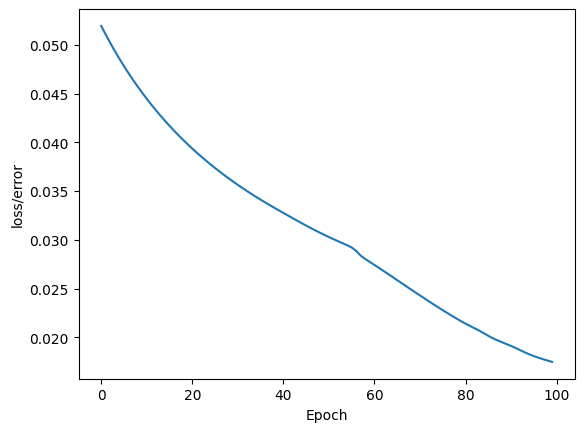

In [27]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [59]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off propagration
  y_val = model.forward(X_test) # X_test are features from the test set. y_val will be predictions
  loss = criterion(y_val, y_test) # Find the loss or error

In [60]:
loss

tensor(0.1784)

In [68]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    # Will print what type of flower class the network thinks it is
    print(f'{i+1}.) {str(y_val)} \t  {y_test[i]}:{x} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item()  == y_test[i]:
      correct += 1

print(f'We get {correct} correct!')


1.) tensor([-7.1455,  3.8413,  8.9871]) 	  2:Virginica 	 2
2.) tensor([-9.9048,  1.6718, 16.1223]) 	  2:Virginica 	 2
3.) tensor([-10.9332,   2.8676,  16.4577]) 	  2:Virginica 	 2
4.) tensor([-3.9721,  7.8497, -1.0292]) 	  1:Versicolor 	 1
5.) tensor([-9.0422,  3.4844, 12.5741]) 	  2:Virginica 	 2
6.) tensor([-2.1100,  8.5816, -5.1552]) 	  1:Versicolor 	 1
7.) tensor([-6.9497,  4.8942,  7.4118]) 	  2:Virginica 	 2
8.) tensor([-3.8674,  8.0269, -1.4135]) 	  1:Versicolor 	 1
9.) tensor([-7.9727,  4.1934,  9.9512]) 	  2:Virginica 	 2
10.) tensor([-10.5891,   1.7318,  17.2016]) 	  2:Virginica 	 2
11.) tensor([-6.5618,  5.0615,  6.5757]) 	  2:Virginica 	 2
12.) tensor([ 11.6368,   1.5849, -20.5907]) 	  0:Setosa 	 0
13.) tensor([ 10.6881,   1.4099, -18.7038]) 	  0:Setosa 	 0
14.) tensor([-0.4877,  6.8020, -5.8184]) 	  1:Versicolor 	 1
15.) tensor([  9.4158,   2.5891, -17.9623]) 	  0:Setosa 	 0
16.) tensor([-6.0888,  5.6836,  5.0628]) 	  2:Virginica 	 1
17.) tensor([ 10.4663,   1.7461, -18.76